In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the data
data = pd.read_csv("Mall_Customers.csv",index_col=0)

In [4]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
# checking if any null values are there
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# checking if any Special characters are not present in data
for i in data.columns:
    print(f"Unique values for column {i}\n\n{data[i].unique()}\n")

Unique values for column Gender

['Male' 'Female']

Unique values for column Age

[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]

Unique values for column Annual Income (k$)

[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]

Unique values for column Spending Score (1-100)

[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]



In [8]:
# changing the datatype as you cannot perform analysis on character data

data['Gender']=data.Gender.map({'Female':0,'Male':0})

In [9]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [10]:
x = data.values[:,[2,3]]  #assigning data to x 

In [11]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'WSSE')

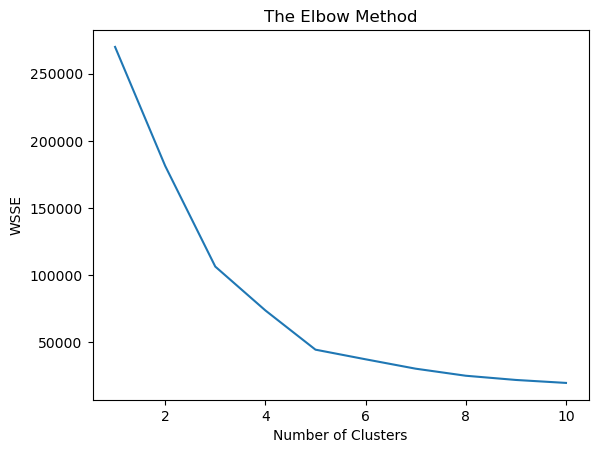

In [12]:
# importing the Kmeans Alogrithm and plotting the data
from sklearn.cluster import KMeans

wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')

In [13]:
kmeans = KMeans(n_clusters=5, random_state=10)
Y_pred = kmeans.fit_predict(x)

c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ratan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [15]:
data['clusters']=Y_pred
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,0,19,15,39,3
2,0,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3
6,0,22,17,76,0
7,0,35,18,6,3
8,0,23,18,94,0
9,0,64,19,3,3


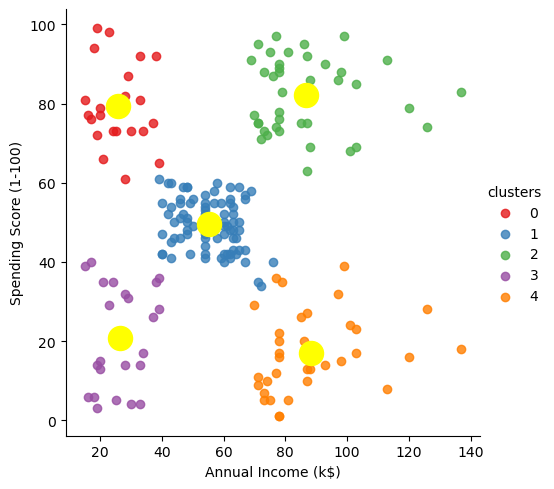

In [19]:
sns.lmplot(data=data , x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, #No regression Line
           hue="clusters",palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s=300, c='yellow')
plt.show()

In [27]:
data['clusters']= data.clusters.map({0:'Standard', 1:'Sensible', 2:'Target', 3:'Careless', 4:'Carefull'})

In [28]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,cluster
CustomerID,,,,,,
1,0,19,15,39,Careless,Careless
2,0,21,15,81,Standard,Standard
3,0,20,16,6,Careless,Careless
4,0,23,16,77,Standard,Standard
5,0,31,17,40,Careless,Careless
...,...,...,...,...,...,...
196,0,35,120,79,Target,Target
197,0,45,126,28,Carefull,Carefull
198,0,32,126,74,Target,Target


In [29]:
data_new = data[data['cluster']=='Target']

In [30]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,cluster
CustomerID,,,,,,
124,0,39,69,91,Target,Target
126,0,31,70,77,Target,Target
128,0,40,71,95,Target,Target
130,0,38,71,75,Target,Target
132,0,39,71,75,Target,Target
134,0,31,72,71,Target,Target
136,0,29,73,88,Target,Target
138,0,32,73,73,Target,Target
140,0,35,74,72,Target,Target


In [31]:
data_new.to_csv('Final_data.csv',index=True)